# Notebook for approximating q efficiency curve from photo

Since we have a sample quantum efficiency curve from hamamatsu (see ./hamamatsu.pdf) we can extract the curve by taking a screenshot (q_eff_curve.png) and then using https://wpd.starrydata2.org/. We have done this and created a dataset by drawing the curve, and the dataset is stored in ./data.csv. We then use the dataset here to approximate a function for this curve below

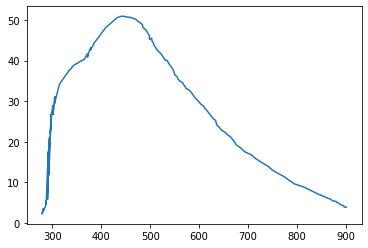

In [7]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plot

#First we open the data
arr = np.loadtxt("data.csv",
                 delimiter=",", dtype=str).astype(float)
xdata,ydata = arr[:,0],arr[:,1]
#Now we can plot it
plot.plot(arr[:,0],arr[:,1])

Now to approx the curve as a polynomial, use np.polyfit

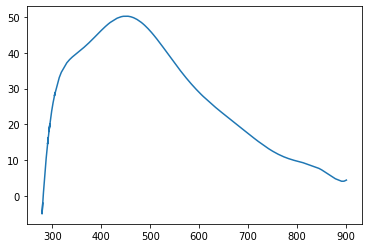

In [8]:
z = np.polyfit(xdata,ydata, 10)
p = np.poly1d(z)
plot.plot(xdata,p(xdata))

Now we can calculate some sample q efficiency values from this curve

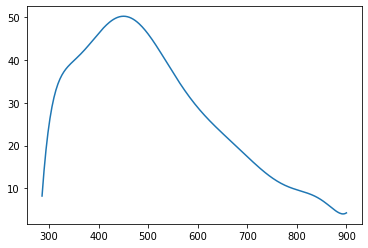

In [9]:
wavelengths = np.linspace(286,900,(900 - 286) // 2 + 1 )
q_eff = p(wavelengths)
plot.plot(wavelengths,q_eff)

Finally, we round these values to one decimal place

In [10]:
q_eff_round = np.round(q_eff * 10) / 10
q_eff_round

array([ 8.2, 11.3, 14.1, 16.7, 19. , 21.1, 23.1, 24.8, 26.4, 27.8, 29.1,
       30.2, 31.2, 32.2, 33. , 33.7, 34.4, 35. , 35.6, 36. , 36.5, 36.9,
       37.3, 37.6, 37.9, 38.2, 38.5, 38.7, 39. , 39.2, 39.4, 39.6, 39.9,
       40.1, 40.3, 40.5, 40.7, 41. , 41.2, 41.4, 41.7, 41.9, 42.2, 42.4,
       42.7, 42.9, 43.2, 43.5, 43.7, 44. , 44.3, 44.6, 44.9, 45.1, 45.4,
       45.7, 46. , 46.2, 46.5, 46.8, 47. , 47.3, 47.5, 47.8, 48. , 48.2,
       48.5, 48.7, 48.9, 49. , 49.2, 49.4, 49.5, 49.7, 49.8, 49.9, 50. ,
       50.1, 50.1, 50.2, 50.2, 50.3, 50.3, 50.3, 50.2, 50.2, 50.2, 50.1,
       50. , 49.9, 49.8, 49.7, 49.6, 49.4, 49.3, 49.1, 48.9, 48.7, 48.5,
       48.3, 48. , 47.8, 47.5, 47.3, 47. , 46.7, 46.4, 46.1, 45.8, 45.5,
       45.2, 44.8, 44.5, 44.1, 43.8, 43.4, 43.1, 42.7, 42.4, 42. , 41.6,
       41.3, 40.9, 40.5, 40.1, 39.8, 39.4, 39. , 38.6, 38.2, 37.9, 37.5,
       37.1, 36.8, 36.4, 36. , 35.7, 35.3, 35. , 34.6, 34.2, 33.9, 33.6,
       33.2, 32.9, 32.6, 32.2, 31.9, 31.6, 31.3, 31

These values were then copied into the steering file npsim_local3.py.